In [27]:
import pandas as pd
import numpy as np
from numpy import exp, array, random, dot

df = pd.read_csv('ce889_dataCollection.csv',header = None)
df.columns = ['X1','X2','y1','y2']

In [28]:
df_norm = (df - df.min())/(df.max() - df.min())
df_norm

,X1,X2,y1,y2
0,0.154064,0.506504,0.365079,0.472685
1,0.154064,0.506504,0.357143,0.476276
2,0.154038,0.506642,0.349206,0.472685
3,0.154038,0.506919,0.341270,0.476276
4,0.154012,0.507334,0.333333,0.472685
...,...,...,...,...
16680,0.517464,0.047488,0.930628,0.786263
16681,0.515201,0.037639,0.930628,0.786263
16682,0.512939,0.027791,0.930628,0.786263
16683,0.510676,0.017942,0.930628,0.786263


In [29]:
df_norm.to_csv('norm.csv',index =False)

In [30]:
X = df_norm[['X1','X2']].values
y = df_norm[['y1','y2']].values

In [31]:
X

array([[0.15406366, 0.50650425],
       [0.15406366, 0.50650425],
       [0.15403775, 0.50664246],
       ...,
       [0.51293881, 0.02779074],
       [0.5106762 , 0.01794209],
       [0.50841358, 0.00809344]])

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [34]:
X_test.shape

(5006, 2)

In [38]:
import matplotlib.pyplot as plt
class NN:
    
    def __init__(self):
        
        
        #self.inp = x
        self.iph = 2
        self.oph = 2
        self.hidden = 20
        random.seed(42)
        #self.w_i_h= 2 * random.random((self.hidden,self.ip)) - 1
        
        self.w_i_h =np.random.randn(self.hidden,self.iph)*np.sqrt(2/self.iph)
        
        #self.w_h_o = 2 * random.random((self.op,self.hidden)) - 1
        
        self.w_h_o = np.random.randn(self.oph,self.hidden) *np.sqrt(2/self.hidden)
        
        #self.b_i_h = 2*random.randn((1,self.hidden))-1
        self.b_i_h = np.zeros((1,self.hidden))
        
        #self.b_h_o = 2*random.randn((1,self.op))-1
        self.b_h_o = np.zeros((1,self.oph)) 
        
        #self.epochs =epoch
        self.w_i_h_d = 0
        self.w_h_o_d = 0
        
        self.learning_rate = 0.005
        self.alpha = 0.1
        self.Lambda = 0.5
        self.output_h = np.array([])
        self.output_o = np.array([])
        self.d = dict()
       
        
    def sigmoid(self, x):
        return 1 / (1 + exp(-x*self.Lambda))
    
    def sigmoid_derivative(self, x):
        return x * (1 - x) 
    
    #def loss(predicted,target):
        #errors = np.substract(predicted,target)
        
    def forward_propagation(self,X):
        self.output_h = self.activations(X,self.w_i_h,self.b_i_h)
        self.output_o = self.activations(self.output_h,self.w_h_o,self.b_h_o)
        return self.output_o
    
    
    def train(self,inputs,outputs,epochs):
        #######################Forward Propagation####################################
        for epoch in range(epochs):
            #output_h = self.activations(X,self.w_i_h,self.b_i_h) 
            #output_o = self.activations(output_h,self.w_h_o,self.b_h_o)
            self.forward_propagation(inputs)
            #print("output",output)
                     
            error  = self.output_o-outputs
            loss = np.sqrt(np.sum((np.square(error))/len(y_train)))

            
            self.d[epoch] = loss
            #print(self.d)
            #loss = np.average(np.square(error)/2)
            
            
            #loss = np.average(error)
            #se= math.sqrt(np.square( - np.average(y_train)))
            #self.rmse.append(se)
            
            #print("loss: ",loss)
            #print("rmse",rmse)
            #plt.plot(rmse,epoch)
            #plt.show()
            #print("error",type(error))
            #print("bias before update",self.b_i_h)
        ########################backward propagation####################################
        
        #gradient hidden -> output
            slope_h_o = self.sigmoid_derivative(self.output_o)*self.Lambda
            var = slope_h_o * error  ###element wise multiply
            #print(var,var.shape)
            
            self.w_h_o_d = self.learning_rate * dot(var.T,self.output_h)+self.alpha*self.w_h_o_d
            #b_h_o_d = np.sum(var,axis = 0)*self.learning_rate
           
        
        
        #gradient input ->hidden
            slope_i_h = self.sigmoid_derivative(self.output_h)*self.Lambda
           
            error_i_h = dot(var,self.w_h_o)
            
            d_hidden_layer = error_i_h *slope_i_h #element wise multiply
            
            self.w_i_h_d = self.learning_rate*dot(d_hidden_layer.T,inputs)+ self.alpha*self.w_i_h_d
            #b_i_h_d = np.sum(d_hidden_layer, axis=0) * self.learning_rate
            
        
        #weight updation hidden -> output
            self.w_h_o  -=  self.w_h_o_d * self.alpha
            self.b_h_o -= np.sum(var,axis = 0)*self.learning_rate
            
            
        
        #weight updation  input-> hidden layer
            self.w_i_h  -=   self.w_i_h_d * self.alpha
            self.b_i_h -= np.sum(d_hidden_layer, axis=0) * self.learning_rate
            
            #print("weight backward propagation",self.w_i_h)
            #print("***********************************************************")
            #print("bias backward propagation",self.b_i_h)
    
        
    def activations(self,inp,w,b):
        pred = dot(inp,w.T)+b
        return self.sigmoid(pred)
    
    
       
   
    

In [41]:
import pickle
with open("nn_obj.pickle", "wb") as f:
    pickle.dump(Neural_Network, f)

weights after training [[ 6.21932418e-01 -2.00592395e+00  1.79689027e-01 -7.86324555e-01
  -1.56983868e+00  1.72042541e-01  2.80340746e+00  9.85483454e-01
  -3.84045988e-01  6.37627706e-01  7.16434431e-01  1.79942111e+00
  -5.58520804e-01 -3.18654521e-01  7.79135748e-01 -2.43145895e+00
   9.41460616e-01  1.55314920e+00  3.51319969e+00  2.32462732e-01]
 [ 4.50662701e-01  1.01128996e+00 -7.51631677e-01  1.32628043e+00
   1.11006209e-03  1.65915593e-01  7.51668045e-03 -1.38697608e+00
  -9.11808068e-01 -1.35614041e+00  2.03106211e+00  7.67906759e-01
  -5.75167838e-01 -4.80105824e-01 -1.90644683e+00  8.58328547e-02
   1.23646807e-02  8.33445415e-01 -8.89904003e-03 -2.55162534e+00]]
weights after training [[ 6.56411563e-01 -4.77632354e-01]
 [ 7.39185329e-01  3.09686575e+00]
 [-7.58255403e-01 -3.00001752e-01]
 [ 1.83233485e+00  1.19305375e+00]
 [-3.93947289e-01  1.81289962e+00]
 [-2.17251479e-01 -3.75184893e-01]
 [ 2.70929500e-01 -3.86194119e+00]
 [-2.14682261e+00 -9.40294052e-01]
 [-1.451165

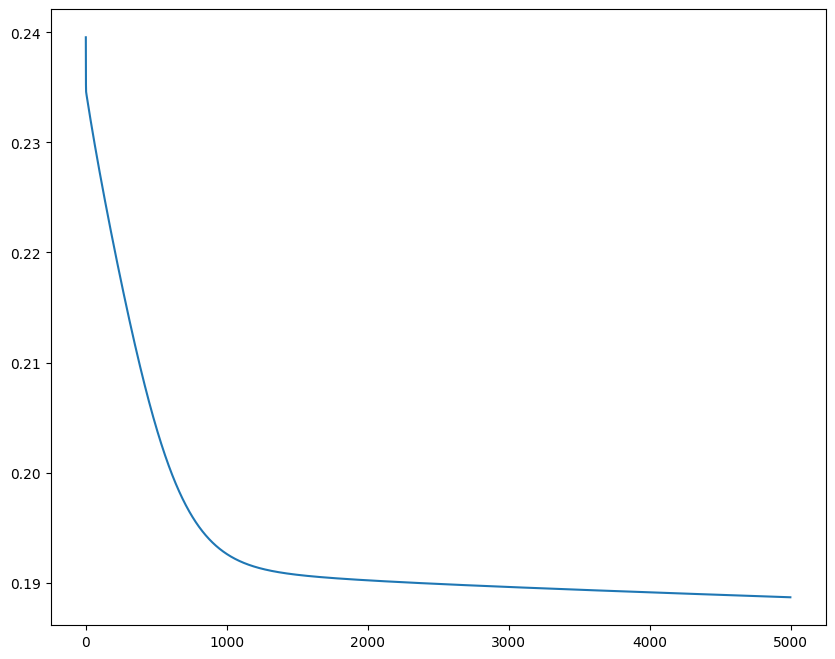

'\nNeural_Network.train(X_test,y_test,979) \nprint(Neural_Network.d)\n\n\nlists = sorted(Neural_Network.d.items())\nx, y = zip(*lists) \nplt.figure(figsize=(10,8))\nplt.plot(x, y)\nplt.show()\n'

In [40]:
import matplotlib.pyplot as plt
Neural_Network  = NN()
#print("weight before training",Neural_Network.w_i_h)
#print(" weight before training", Neural_Network.w_h_o)

#print("weights before training",Neural_Network.w_h_o)

Neural_Network.train(X_train,y_train,5000)
#print(Neural_Network.d)

print("weights after training",Neural_Network.w_h_o)
#rint("ouptut_h", Neural_Network.output_h)
#print("ouptut_h", Neural_Network.output_h.shape)
print("weights after training",Neural_Network.w_i_h)


print("bias after training",Neural_Network.b_h_o)
print("bias after training",Neural_Network.b_i_h)


lists = sorted(Neural_Network.d.items())
x, y = zip(*lists) 
plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.show()  

'''
Neural_Network.train(X_test,y_test,979) 
print(Neural_Network.d)


lists = sorted(Neural_Network.d.items())
x, y = zip(*lists) 
plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.show()
'''






In [20]:
X_test.shape

(5923, 2)

In [21]:
y_test

array([[0.84563758, 0.55071346],
       [0.5447407 , 0.4591822 ],
       [0.21642607, 0.55146159],
       ...,
       [0.62302594, 0.6677582 ],
       [0.83113787, 0.38239944],
       [0.39597315, 0.5475619 ]])

(2, 2)